In [14]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from tqdm import tqdm
import re
from nycc_src.employer import employer as emp
fp = '/home/chansoo/data/nyc_contributions/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%%time
iter_csv = pd.read_csv(f"{fp}/contributions.csv", iterator=True, chunksize=10000)
df = pd.concat(
    [
        chunk[chunk['ELECTION'].astype(str).str.contains('2021')] 
        for chunk in tqdm(iter_csv)
    ]
)
df['id'] = df.index
df = df.loc[df['OFFICECD'].isin(['1','11'])].copy()

130it [00:10, 12.37it/s]


CPU times: user 10.9 s, sys: 1.09 s, total: 12 s
Wall time: 12 s


In [18]:
df.loc[df['EMPNAME']=='jpmorgan'].groupby(['CANDNAME']).agg({'AMNT':'sum','id':'count'})

,AMNT,id
CANDNAME,,
"Adams, Eric L",500.00,2
"Chang, Art",50.00,2
"Donovan, Shaun",2500.00,1
"Garcia, Kathryn A",50.00,1
"McGuire, Raymond J",1250.00,2
"Menchaca, Carlos",50.00,1
"Morales, Dianne",281.00,4
"Wiley, Maya D",184.32,5
"Yang, Andrew",980.56,20


['McGuire, Raymond J', 'Yang, Andrew', 'Adams, Eric L', 'Garcia, Kathryn A', 'Wiley, Maya D', 'Morales, Dianne', 'Donovan, Shaun', 'Stringer, Scott M']


<AxesSubplot:xlabel='CANDNAME', ylabel='EMPNAME'>

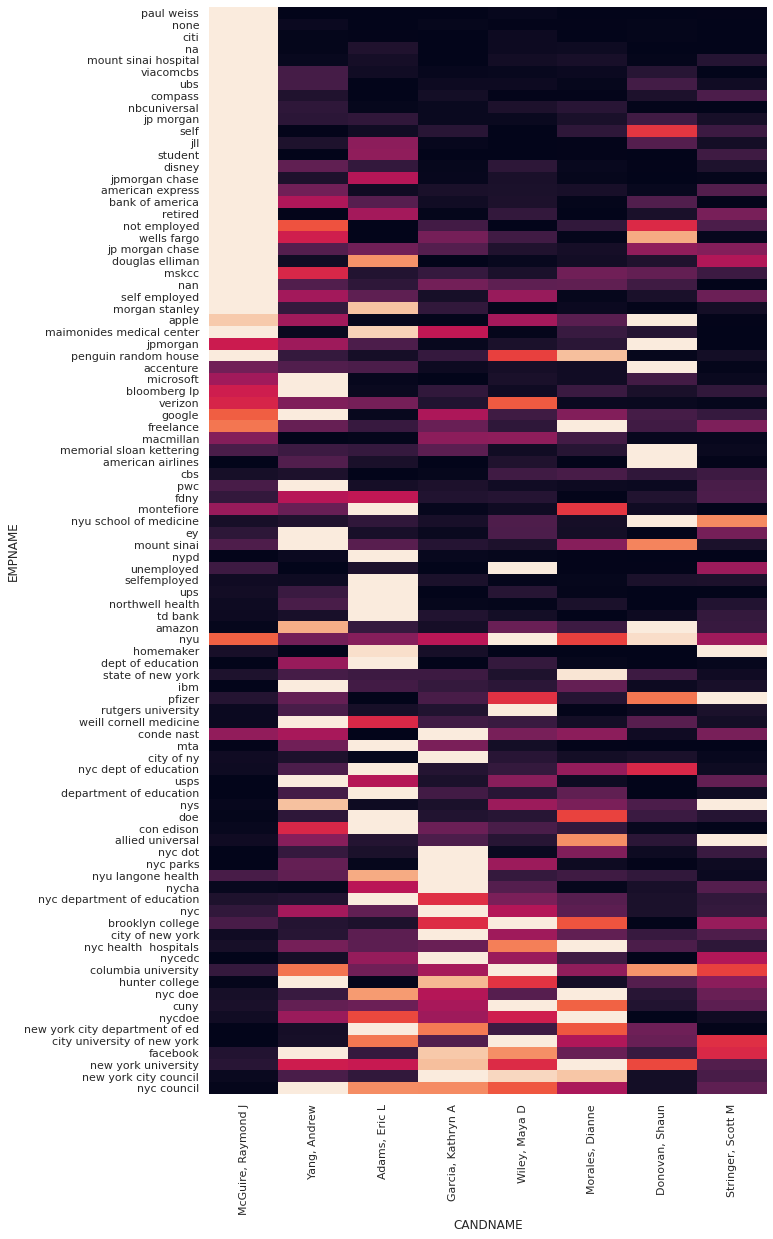

In [15]:
df['EMPNAME'] = emp.cleanname(df['EMPNAME'])
heatmap = emp.heatmap(df=df, value='AMNT')
heatmap.heatmap()

['McGuire, Raymond J', 'Yang, Andrew', 'Adams, Eric L', 'Garcia, Kathryn A', 'Wiley, Maya D', 'Morales, Dianne', 'Donovan, Shaun', 'Stringer, Scott M']


<AxesSubplot:xlabel='CANDNAME', ylabel='EMPNAME'>

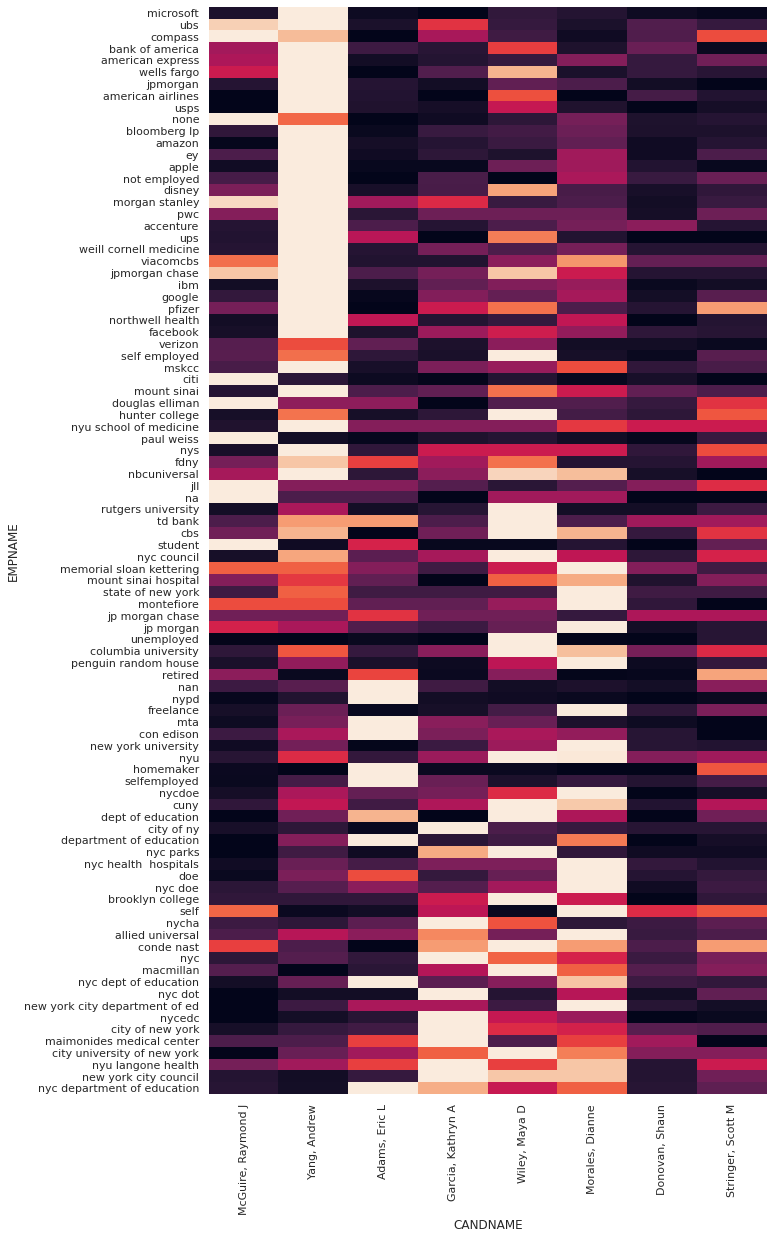

In [16]:
df['EMPNAME'] = emp.cleanname(df['EMPNAME'])
heatmap = emp.heatmap(df=df, value='count')
heatmap.heatmap()